## Exploratory Data Analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("UNR-IDD.csv")
data.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack


In [6]:
data.shape

(37411, 34)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Packets Rx Dropped             37411 non-null  int64 
 8   Packets Tx Dropped             37411 non-null  int64 
 9   Packets Rx Errors              37411 non-null  int64 
 10  Packets Tx Errors              37411 non-null  int64 
 11  Delta Received Packets         37411 non-null  int64 
 12  Delta Received Bytes           37411 non-null  int64 
 13  D

## Data Pre-processing 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score 

In [9]:
labelencoder = LabelEncoder()

labelencoder.fit(data['Switch ID'])
data ['Switch ID'] = labelencoder.transform(data['Switch ID'])

labelencoder.fit(data['Port Number'])
data ['Port Number'] = labelencoder.transform(data['Port Number'])

labelencoder.fit(data['is_valid'])
data ['is_valid'] = labelencoder.transform(data['is_valid'])

labelencoder.fit(data['Binary Label'])
data ['Binary Label'] = labelencoder.transform(data['Binary Label'])

In [10]:
X = data.drop('Label',axis=1).values
y = data['Label'].values

In [11]:
print(X)
print(y)

[[    11      0    132 ...    688     -1      0]
 [    11      1    187 ...    688     -1      0]
 [    11      2    235 ...    688     -1      0]
 ...
 [     8      0   1042 ... 295404     -1      0]
 [     8      1 149012 ... 295404     -1      0]
 [     8      2    228 ... 295404     -1      0]]
['TCP-SYN' 'TCP-SYN' 'TCP-SYN' ... 'PortScan' 'PortScan' 'PortScan']


In [12]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4, random_state = 42)

In [13]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(22446, 33)
(14965, 33)
(22446,)
(14965,)


## Building the model

In [14]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred = knn.predict(X_test)
print (y_pred)
print (y_test)

['PortScan' 'Blackhole' 'Diversion' ... 'PortScan' 'TCP-SYN' 'TCP-SYN']
['PortScan' 'Blackhole' 'Diversion' ... 'PortScan' 'TCP-SYN' 'TCP-SYN']


In [16]:
print (knn.score(X_train, y_train))
print (knn.score(X_test, y_test))

0.8980664706406487
0.7921817574340126


## Evaluating the performance of the model

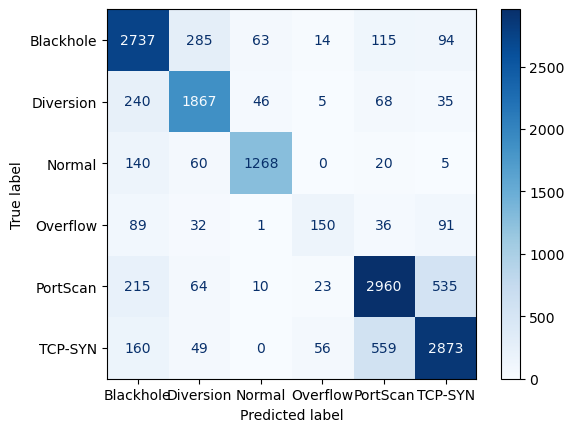

In [17]:
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

In [18]:
train_scores = []
test_scores = []
neighbours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50]

for neighbour in neighbours:
    knn = KNeighborsClassifier(n_neighbors= neighbour)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict (X_test)
    train_score = accuracy_score (y_train, train_pred)
    test_score = accuracy_score(y_test, test_pred)
    train_scores.append (train_score)
    test_scores.append (test_score)

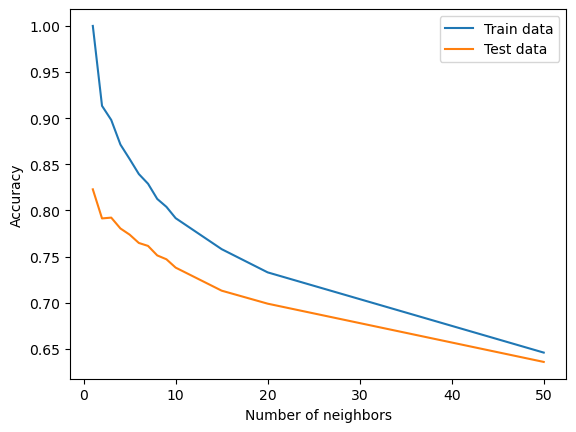

In [28]:
plt.plot(neighbours, train_scores,label='Train data')
plt.plot(neighbours, test_scores,label='Test data')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()